In [41]:
# Load Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Load Data
diet_nutrient_day_1 = pd.read_sas('/content/drive/MyDrive/CS_179M_Project/DR1TOT_L.xpt', format='xport')
body_measures = pd.read_sas('/content/drive/MyDrive/CS_179M_Project/BMX_L.xpt', format='xport')

In [43]:
diet_nutrient_day_1.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,130378.0,61366.555827,70554.222162,1.0,73.0,2.0,2.0,40.0,4.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,130379.0,34638.056480,36505.468348,1.0,73.0,2.0,2.0,19.0,4.0,1.0,...,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,130380.0,84728.261560,103979.190677,1.0,73.0,2.0,2.0,16.0,4.0,1.0,...,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0
3,130381.0,61737.133446,75009.220819,1.0,91.0,2.0,2.0,23.0,5.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,130382.0,75846.746917,172361.851828,1.0,73.0,2.0,2.0,27.0,6.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [ ]:
# Preprocessing diet_nutrient_day_1

# 1. Only keep data that is reliable and meets the minimum criteria (DR1DRSTZ = 1)
diet_nutrient_day_1 = diet_nutrient_day_1[diet_nutrient_day_1['DR1DRSTZ'] == 1]

# 2. Drop columns with high missing values
missing_rate = 0.8
missing_fractions = diet_nutrient_day_1.isnull().mean()
cols_to_drop = missing_fractions[missing_fractions > missing_rate].index.tolist()
diet_nutrient_day_1.drop(columns=cols_to_drop, inplace=True)

# 3. Append BMXWT from BMX_L (Only keep the rows with BMXWT)
body_measures_weight = body_measures[['SEQN', 'BMXWT']].copy()
body_measures_weight.dropna(subset=['BMXWT'], inplace=True)
diet_nutrient_day_1 = pd.merge(diet_nutrient_day_1, body_measures_weight, on='SEQN', how='inner')

# 4. Fill NaN values with the median
diet_nutrient_day_1 = diet_nutrient_day_1.fillna(diet_nutrient_day_1.median())

# 5. Drop useless columns, like ID
cols_to_drop = ['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF',
                'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MRESP', 'DR1HELP']
X = diet_nutrient_day_1.drop(columns=cols_to_drop, errors='ignore')

# 6. Add scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
diet_nutrient_day_1 = diet_nutrient_day_1.copy()
diet_nutrient_day_1['PCA1'] = X_pca[:, 0]
diet_nutrient_day_1['PCA2'] = X_pca[:, 1]
diet_nutrient_day_1[['SEQN', 'PCA1', 'PCA2']].head()

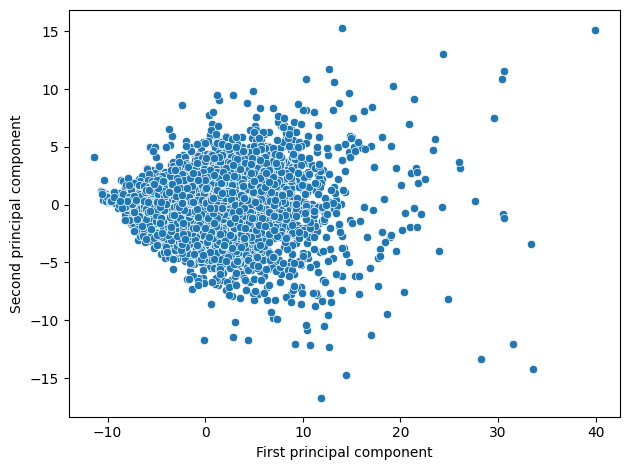

In [ ]:
plt.figure()
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.tight_layout()
plt.show()